<a href="https://colab.research.google.com/github/vfunnny2000/Statistics/blob/main/HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

**1.** Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [2]:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


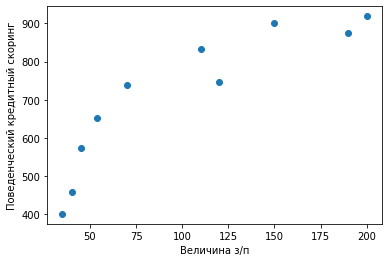

In [3]:
plt.scatter(zp,ks)
plt.xlabel('Величина з/п')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Большим значениям величины заработной платы соответствуют большие размеры кредитного скоринга => между этими данными существует выраженная положительная корреляция.

Найдем коэффициент ковариации по формуле:
\begin{align}
\displaystyle cov_{X,Y}=M(XY)-M(X)\cdot M(Y)
\end{align}

In [4]:
def covar(array1, array2):
    MXY=sum(array1*array2)/len(array1)
    MX=sum(array1)/len(array1)
    MY=sum(array2)/len(array2)
    return MXY-MX*MY

Коэффициент ковариации:

In [5]:
covar(zp,ks)

9157.839999999997

функция cov библиотеки numpy:

In [6]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Коэффициент корреляции Пирсона:
\begin{align}
\displaystyle r_{X,Y}=\frac{cov_{X,Y}}{\sigma_X\cdot\sigma_Y}
\end{align}

In [7]:
def sigma(array, offset=True):
    mean_array=sum(array)/len(array)
    square_dev=(array-mean_array)**2
    variance=sum(square_dev)/len(array) if offset else sum(square_dev)/(len(array)-1)
    return variance**0.5    

In [8]:
r=covar(zp, ks)/(sigma(zp)*sigma(ks))
print(f'Коэффициент корреляции r = {r: .5f}')

Коэффициент корреляции r =  0.88749


In [9]:
r1=np.cov(zp, ks, ddof=1)/(sigma(zp, offset=False)*sigma(ks, offset=False))
print(f'Коэффициент корреляции r = {r1}')

Коэффициент корреляции r = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


функция corrcoef библиотеки numpy:

In [12]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

функция corr библиотеки pandas:

In [14]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [15]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


Существует сильная линейная взаимосвязь между исходными данными.

**2.** Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

для расчета 95%-го доверительного интервала используем t-критерий:
\begin{align}
\displaystyle\bar X\pm t_{\alpha/2}\cdot\frac{\sigma_{несмещ}}{\sqrt{n}}
\end{align}

In [16]:
arr=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
print(f'Среднее выборочное: {np.mean(arr): .2f},\n'
      f'Размер выборки n={len(arr)},\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {np.std(arr, ddof=1): .2f}.'
     )

Среднее выборочное:  118.10,
Размер выборки n=10,
Среднее квадратическое отклонение по выборке(несмещенное):  10.55.


In [17]:
import scipy.stats as stats

In [18]:
def t_from_table(confidens, len_array):
    alpha=(1-confidens)
    return stats.t.ppf(1-alpha/2, len_array-1)
print(f'Табличное значение t-критерия для 95%-го доверительного интервала данной выборки: {t_from_table(0.95, len(arr)): .3f}')

Табличное значение t-критерия для 95%-го доверительного интервала данной выборки:  2.262


In [19]:
def confidens_int(arr, confidens):
    return round(np.mean(arr)-t_from_table(confidens,len(arr))*np.std(arr, ddof=1)/len(arr)**0.5,3), \
           round(np.mean(arr)+t_from_table(confidens,len(arr))*np.std(arr, ddof=1)/len(arr)**0.5,3)

print(f'95%-й доверительный интервал для истинного значения IQ: {confidens_int(arr, 0.95)}.')

95%-й доверительный интервал для истинного значения IQ: (110.556, 125.644).


**3.** Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.

Поскольку известнa дисперсия генеральной совокупности \begin{align}\sigma^2=25\end{align}для расчета 
95%  доверительного интервала будем использовать 
Z-критерий. И границы доверительного интервала расчитаем по формуле:
\begin{align}
\displaystyle\bar X\pm z_{\alpha/2}\cdot\frac{\sqrt{\sigma^2}}{\sqrt n}
\end{align}
\begin{align}\bar X=M=174.2\end{align}
\begin{align}z_{\alpha/2}=1.96\end{align}
\begin{align}\sigma^2=25\end{align}
\begin{align}n=27\end{align}

In [20]:
left=174.2-(1.96*25**0.5)/27**0.5
right=174.2+(1.96*25**0.5)/27**0.5
print(f'95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности: [{left: .4f};{right: .4f}].')

95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности: [ 172.3140; 176.0860].
